# Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [1]:
#Importing necessary libraries
import numpy as np   
import pandas as pd 
import copy
import os
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
%matplotlib inline 
import math
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Importing the data
df_diamond = pd.read_csv('cubic_zirconia.csv')

In [3]:
df_diamond_copy = df_diamond.copy()

In [4]:
#Head info
df_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
#Shape of the data(rows,columns)
df_diamond.shape

(26967, 11)

In [6]:
#Since the first column is no of any significance in the analysis, its dropped
df_diamond.drop(df_diamond.columns[0], axis=1,inplace=True)

In [7]:
#DataFrame Information
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [8]:
#DataFrame Description
df_diamond.describe(include = 'all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [9]:
#Duplicates check
dups = df_diamond.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_diamond[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [10]:
#Dropping Duplicates
df_diamond.drop_duplicates(inplace=True)

In [11]:
#Skewness check
skew = df_diamond.skew() 
print("Skewness of the Dataset:\n",skew)

Skewness of the Dataset:
 carat    1.114789
depth   -0.026086
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64


In [12]:
#spread value counts for object datatypes
print('Cut Distribution \n',df_diamond.cut.value_counts())
print('\n')
print('Colour Distribution \n',df_diamond.color.value_counts())
print('\n')
print('Clarity Distribution \n',df_diamond.clarity.value_counts())

Cut Distribution 
 Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


Colour Distribution 
 G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


Clarity Distribution 
 SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


In [13]:
#Coefficient of Variation
cv = df_diamond.std()/df_diamond.mean()
print(cv)

carat    0.598034
depth    0.022872
table    0.038850
x        0.196771
y        0.203212
z        0.203508
price    1.021594
dtype: float64


In [14]:
df_diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

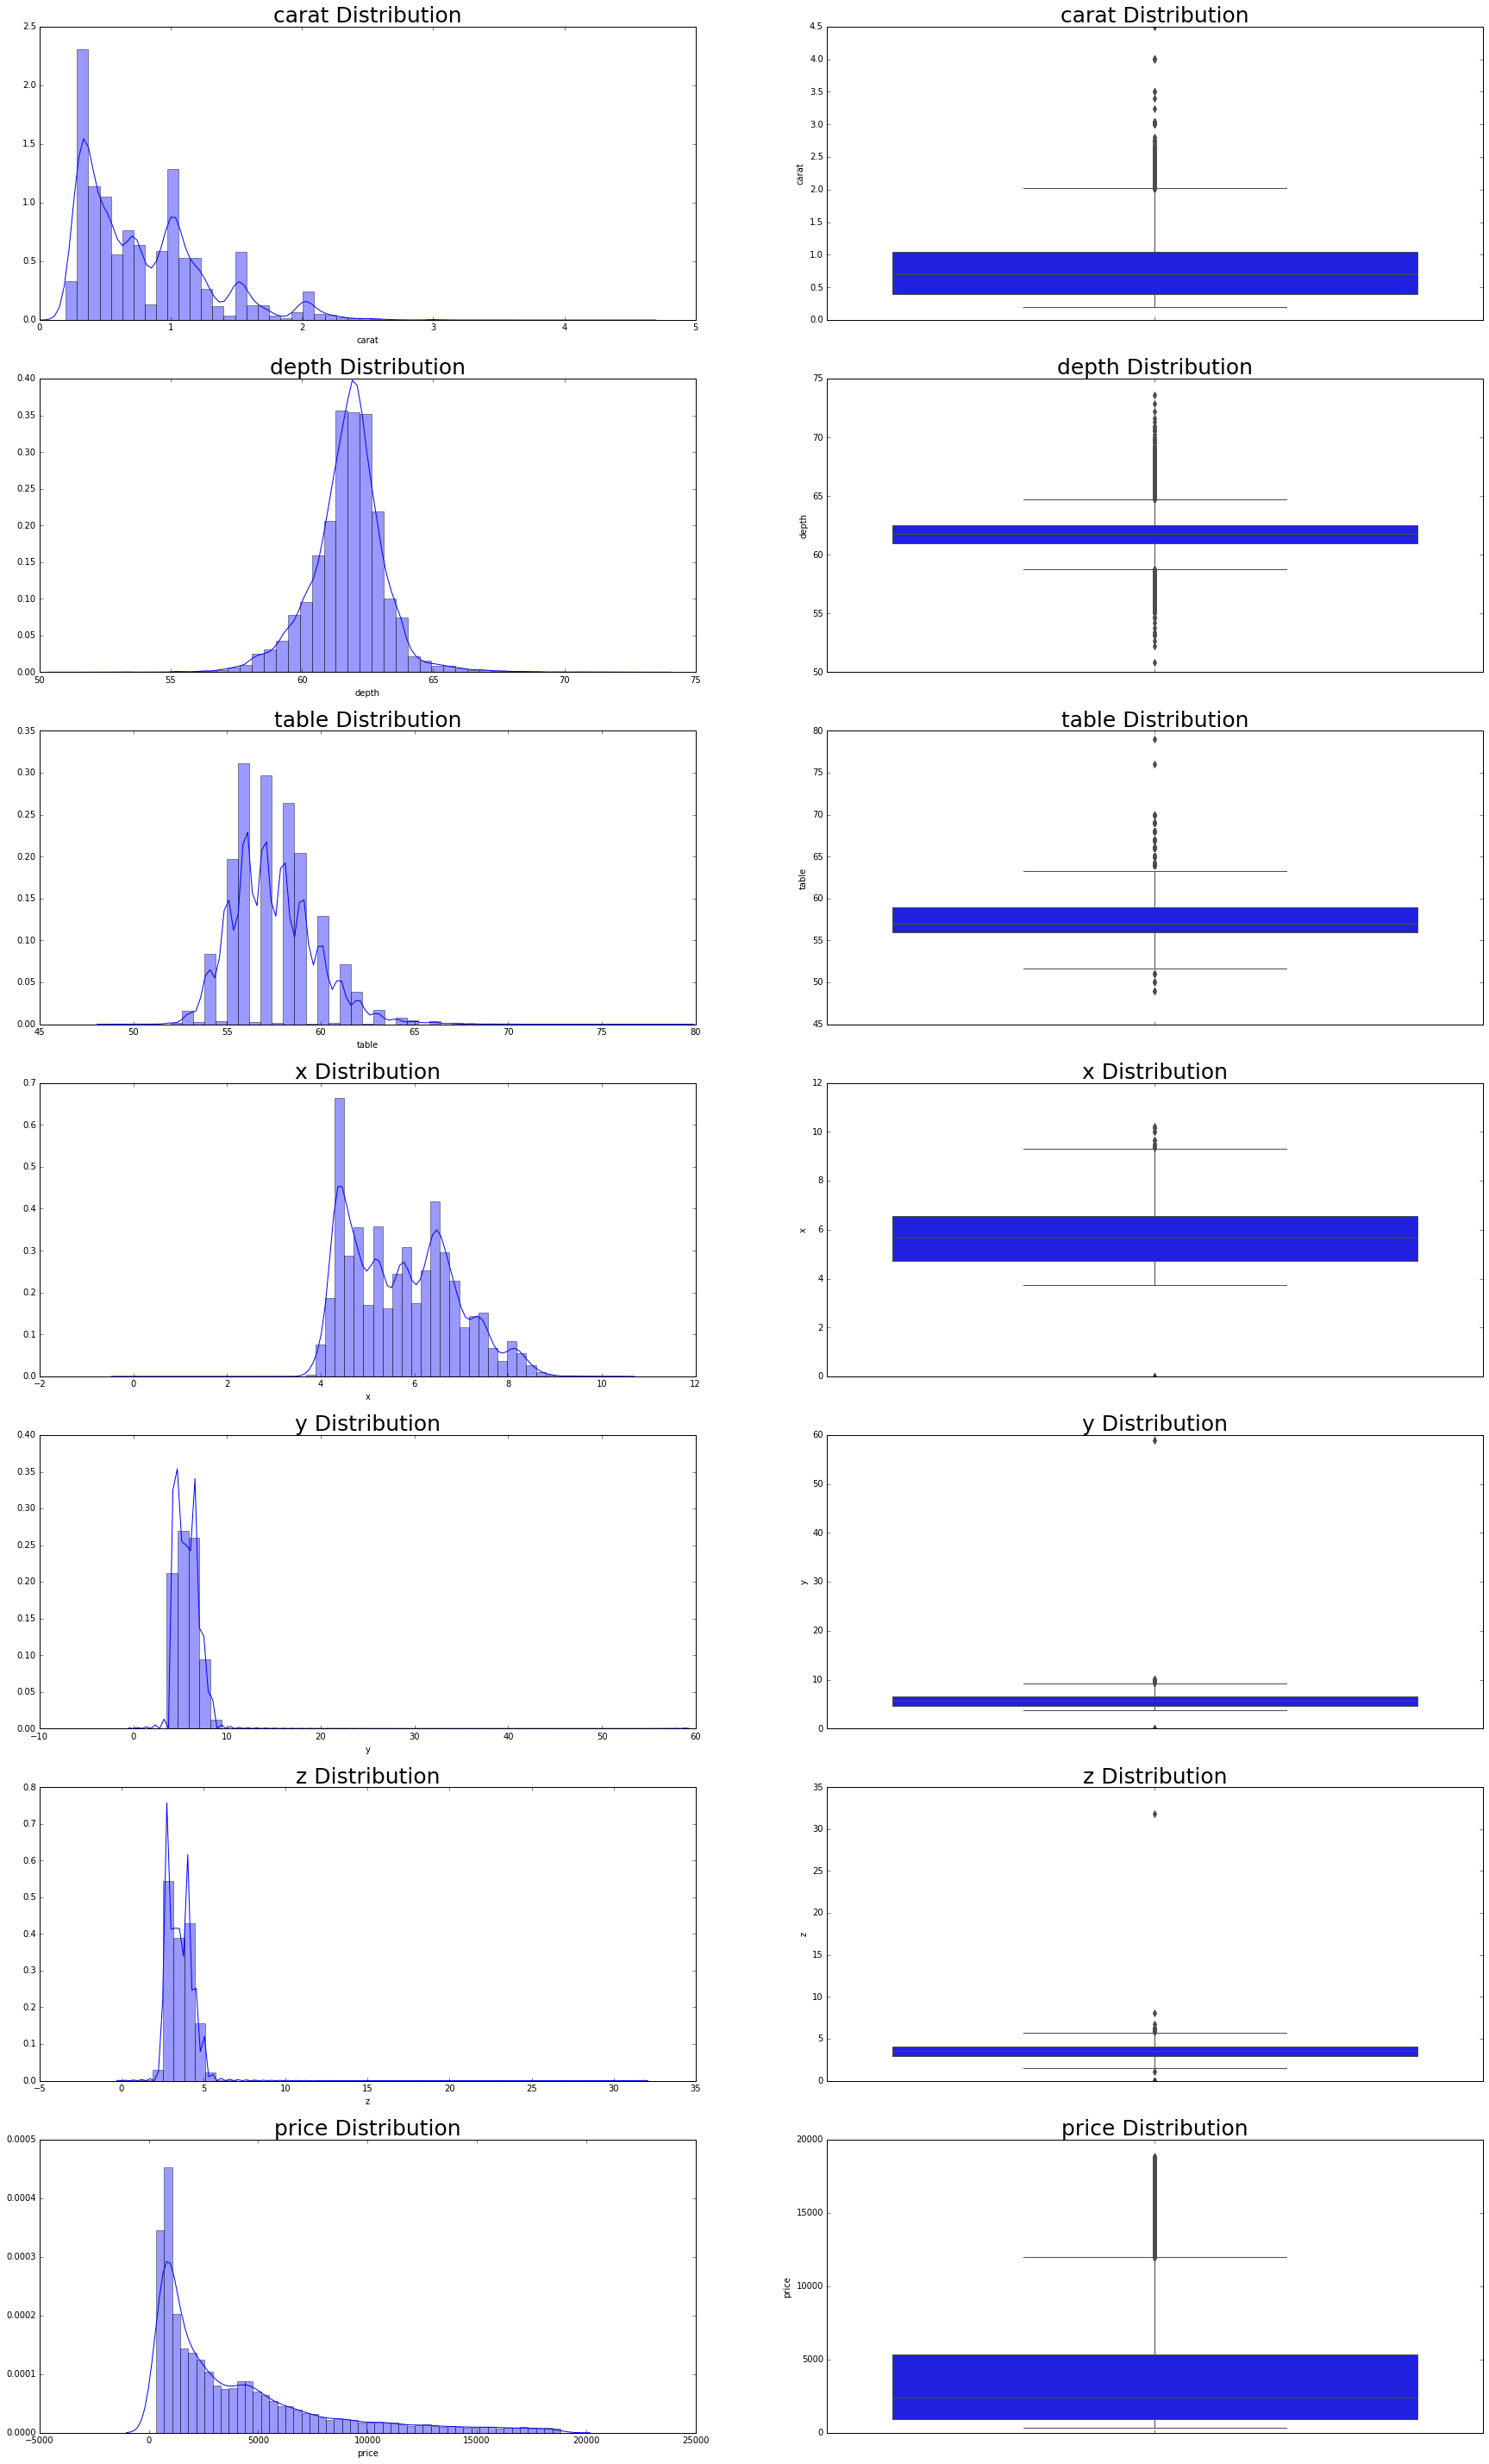

In [15]:
#univariate analysis (Distplot and Boxplot)
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(30, 50)

a = sns.distplot(df_diamond['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=25)
a = sns.boxplot(df_diamond['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=25)

a = sns.distplot(df_diamond['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=25)
a = sns.boxplot(df_diamond['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=25)

a = sns.distplot(df_diamond['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=25)
a = sns.boxplot(df_diamond['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=25)

a = sns.distplot(df_diamond['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=25)
a = sns.boxplot(df_diamond['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=25)

a = sns.distplot(df_diamond['y'] , ax=axes[4][0])
a.set_title("y Distribution",fontsize=25)
a = sns.boxplot(df_diamond['y'] , orient = "v" , ax=axes[4][1])
a.set_title("y Distribution",fontsize=25)

a = sns.distplot(df_diamond['z'] , ax=axes[5][0])
a.set_title("z Distribution",fontsize=25)
a = sns.boxplot(df_diamond['z'] , orient = "v" , ax=axes[5][1])
a.set_title("z Distribution",fontsize=25)

a = sns.distplot(df_diamond['price'] , ax=axes[6][0])
a.set_title("price Distribution",fontsize=25)
a = sns.boxplot(df_diamond['price'] , orient = "v" , ax=axes[6][1])
a.set_title("price Distribution",fontsize=25)


plt.show()

In [16]:
#covariance check
df_diamond.cov()

,carat,depth,table,x,y,z,price
carat,0.227755,0.023724,0.193388,0.525571,0.523441,0.323315,1.770758e+03
depth,0.023724,1.994429,-0.938126,-0.029269,-0.040241,0.100607,-1.643333e+01
table,0.193388,-0.938126,4.982523,0.493865,0.474215,0.239445,1.138925e+03
x,0.525571,-0.029269,0.493865,1.270955,1.264303,0.776348,4.020423e+03
y,0.523441,-0.040241,0.474215,1.264303,1.357312,0.779000,4.013644e+03
z,0.323315,0.100607,0.239445,0.776348,0.779000,0.518348,2.463654e+03
price,1770.758399,-16.433328,1138.925074,4020.423164,4013.643872,2463.653531,1.618092e+07


In [17]:
#correlation check
df_diamond.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


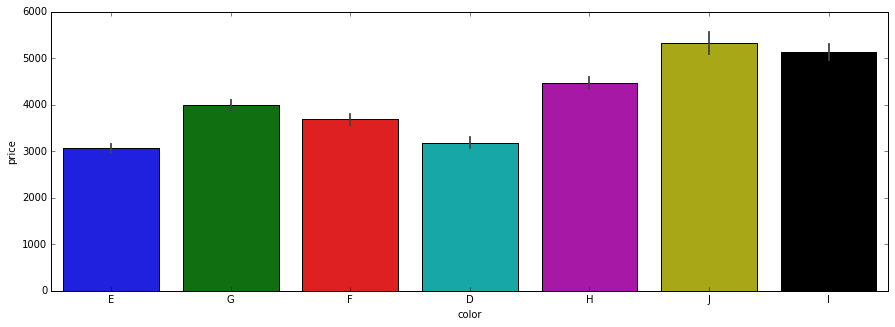

In [18]:
#Bivariate Analysis
#Color Vs Price
plt.figure(figsize=(15,5))
ax = sns.barplot(x='color', y='price',data=df_diamond)


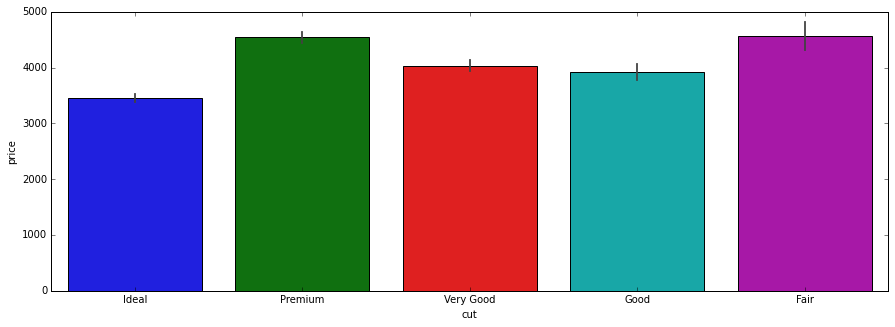

In [19]:
#Cut Vs Price
plt.figure(figsize=(15,5))
ax = sns.barplot(x='cut', y='price',data=df_diamond)

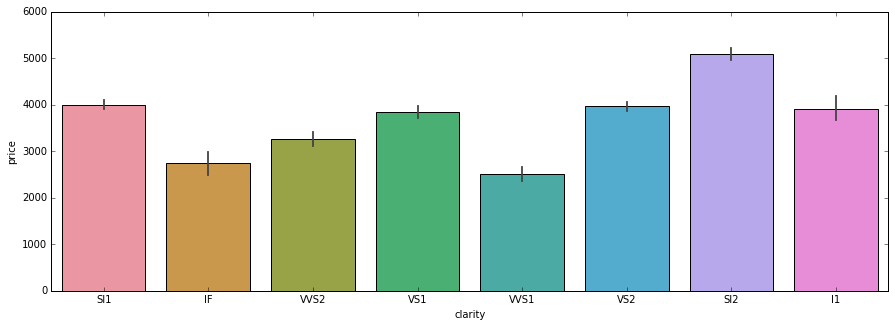

In [20]:
#clarity vs price
plt.figure(figsize=(15,5))
ax = sns.barplot(x='clarity', y='price',data=df_diamond)

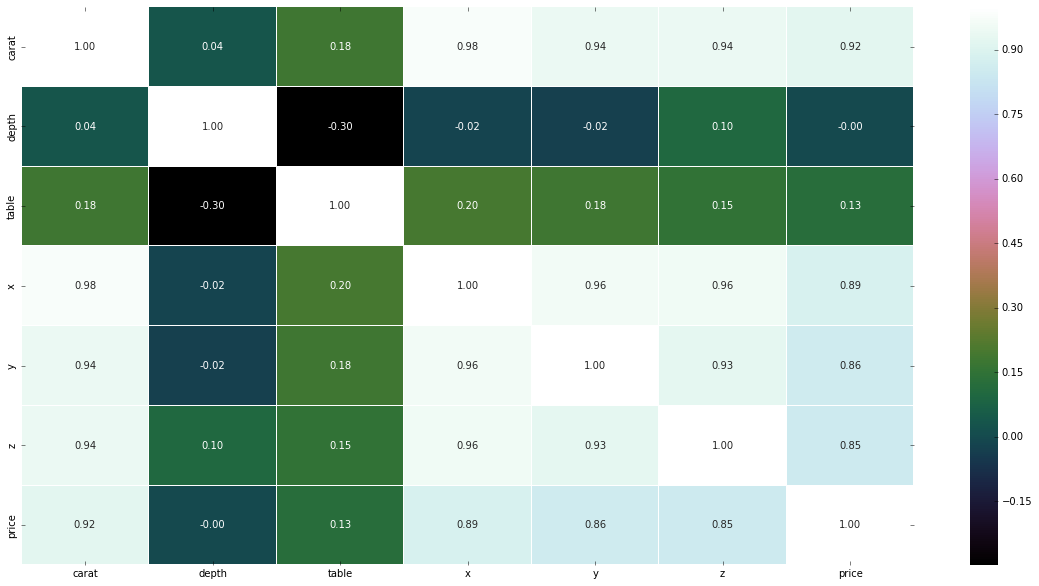

In [21]:
#Heatmap
fig,ax = plt.subplots(figsize=(20,10))   
sns.heatmap(df_diamond.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="cubehelix") 
plt.show()

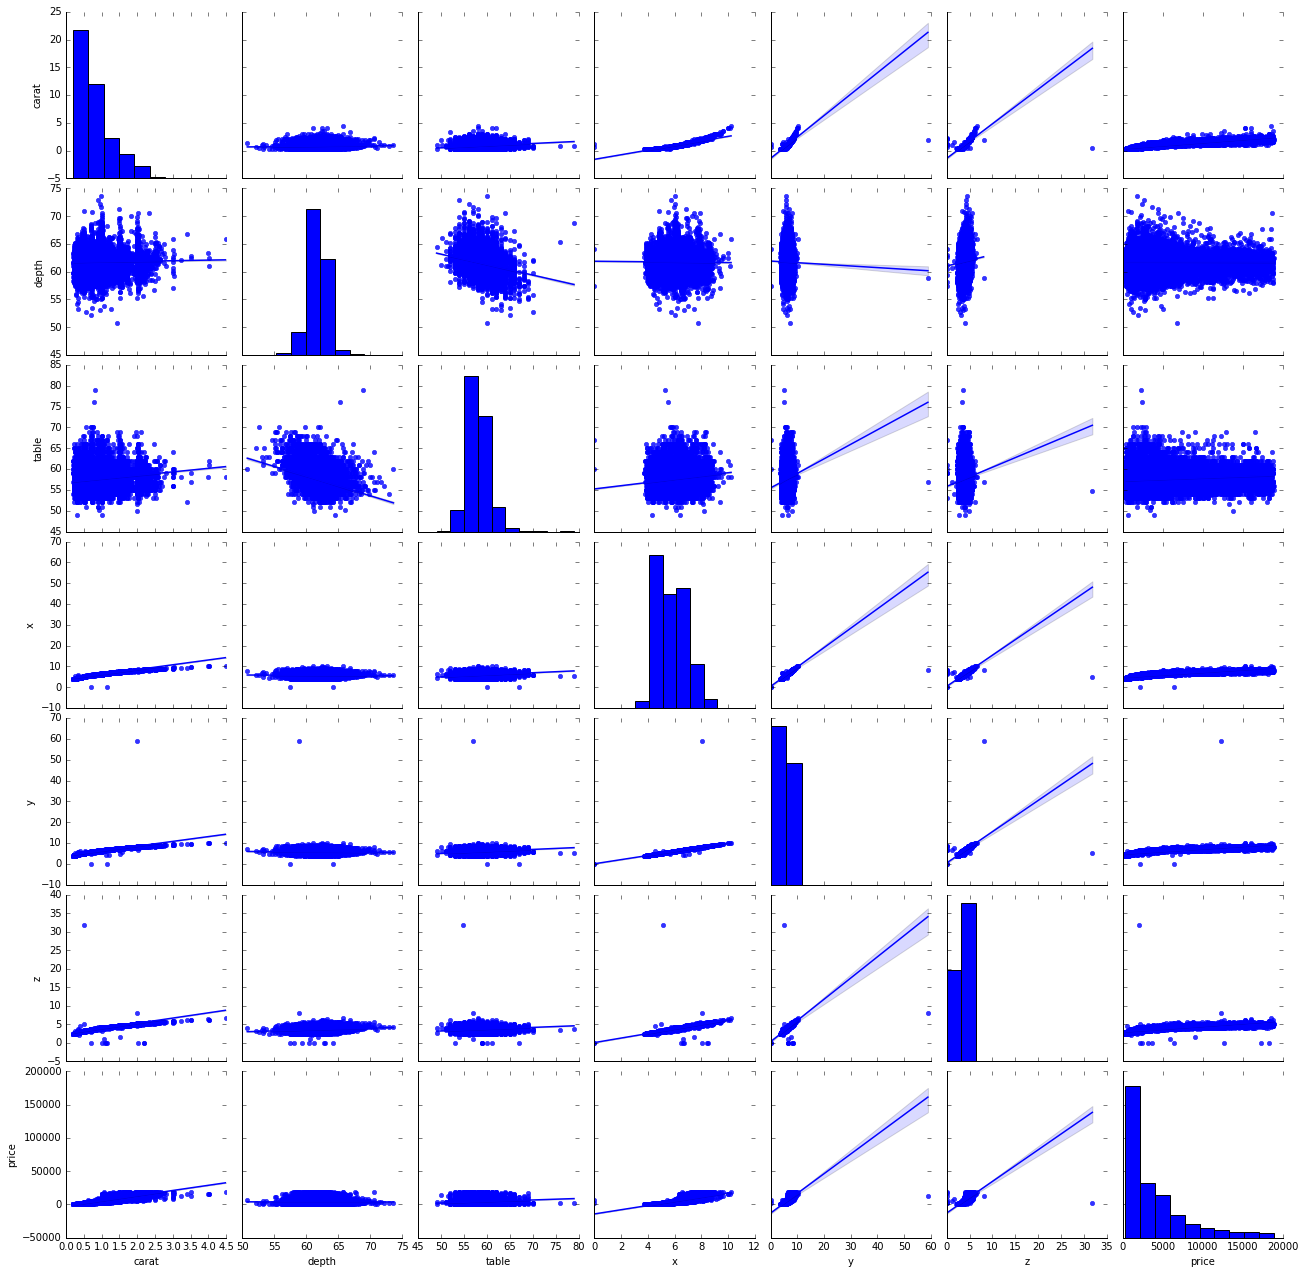

In [22]:
# #Bivariate analysis - Pair plot
sns.pairplot(df_diamond, kind="reg")  
plt.show()

<AxesSubplot:xlabel='carat', ylabel='price'>

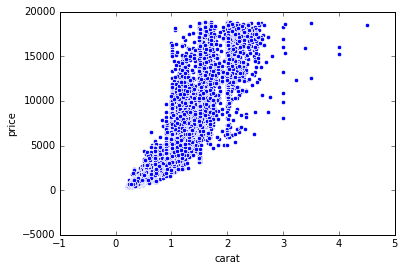

In [23]:
#ScatterPlot - Carat Vs Price
sns.scatterplot(x='carat', y='price', data=df_diamond)  

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [24]:
#Null Values check
df_diamond.isnull().sum() 

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [25]:
#Null Values Imputation
for column in df_diamond.columns:
    if df_diamond[column].dtype != 'object':
        df_diamond_median = df_diamond[column].median()
        df_diamond[column] = df_diamond[column].fillna(df_diamond_median)    
        
df_diamond.isnull().sum()       

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [26]:
#Checking for columns with values as 0
for i in df_diamond.columns:
    print(df_diamond[df_diamond[i]==0].index.tolist())

[]
[]
[]
[]
[]
[]
[5821, 17506]
[5821, 17506]
[5821, 6034, 10827, 12498, 12689, 17506, 18194, 23758]
[]


In [27]:
# Zero values check in DataFrame
df_diamond[(df_diamond['carat']== 0)|(df_diamond['depth']== 0)|(df_diamond['table']== 0)|(df_diamond['price']== 0)|(df_diamond['z']== 0)|(df_diamond['y']== 0)|(df_diamond['x']== 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [28]:
#i = df_diamond[(df_diamond['z']== 0.00)&(df_diamond['y']== 0.00)&(df_diamond['x']== 0.00)].index

In [29]:
#i

In [30]:
#df_diamond.drop(i,inplace=True)

In [31]:
#df_diamond['z']=df_diamond['z'].replace(0,df_diamond['z'].median())

In [32]:
#nan values getting dropped
df_diamond = df_diamond.replace(0, np.nan)
df_diamond.dropna(inplace=True)

In [33]:
df_diamond.shape

(26925, 10)

In [34]:
#Remove outlier function
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [35]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [36]:
#Outlier removal
dtypes=df_diamond.dtypes[(df_diamond.dtypes!= 'object')].index
for column in df_diamond[dtypes].columns:
    lr,ur=remove_outlier(df_diamond[column])
    df_diamond[column]=np.where(df_diamond[column]>ur,ur,df_diamond[column])
    df_diamond[column]=np.where(df_diamond[column]<lr,lr,df_diamond[column])

<AxesSubplot:>

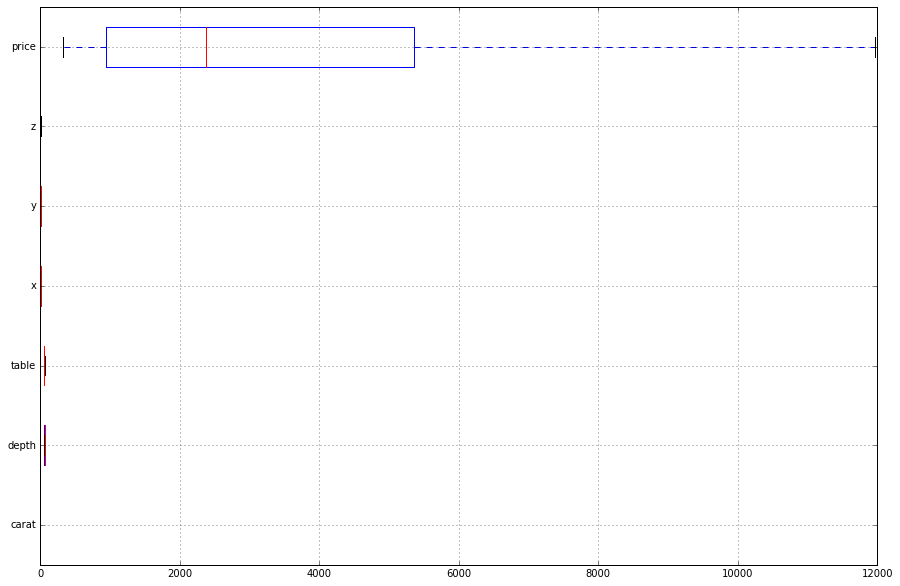

In [37]:
#CHecking the results with outliers
plt.figure(figsize=(15,10))
df_diamond.boxplot(vert=0)

In [38]:
#Imputing object values on cut with numeric values provided
df_diamond['cut']=np.where(df_diamond['cut'] =='Fair', '0', df_diamond['cut'])
df_diamond['cut']=np.where(df_diamond['cut'] =='Good', '1', df_diamond['cut'])
df_diamond['cut']=np.where(df_diamond['cut'] =='Very Good', '2', df_diamond['cut'])
df_diamond['cut']=np.where(df_diamond['cut'] =='Premium', '3', df_diamond['cut'])
df_diamond['cut']=np.where(df_diamond['cut'] =='Ideal', '4', df_diamond['cut'])

In [39]:
#Imputing object values on color with numeric values provided
df_diamond['color']=np.where(df_diamond['color'] =='J', '0', df_diamond['color'])
df_diamond['color']=np.where(df_diamond['color'] =='I', '1', df_diamond['color'])
df_diamond['color']=np.where(df_diamond['color'] =='H', '2', df_diamond['color'])
df_diamond['color']=np.where(df_diamond['color'] =='G', '3', df_diamond['color'])
df_diamond['color']=np.where(df_diamond['color'] =='F', '4', df_diamond['color'])
df_diamond['color']=np.where(df_diamond['color'] =='E', '5', df_diamond['color'])
df_diamond['color']=np.where(df_diamond['color'] =='D', '6', df_diamond['color'])

In [40]:
#Imputing object values on clarity with numeric values provided
df_diamond['clarity']=np.where(df_diamond['clarity'] =='I3', '0', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='I2', '1', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='I1', '2', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='SI2', '3', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='SI1', '4', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='VS2', '5', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='VS1', '6', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='VVS2', '7', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='VVS1', '8', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='IF', '9', df_diamond['clarity'])
df_diamond['clarity']=np.where(df_diamond['clarity'] =='FL', '10', df_diamond['clarity'])

In [41]:
# object to int64
obj_to_int = df_diamond[['cut','color','clarity']]
for i in obj_to_int:
    df_diamond[i] = df_diamond[i].astype('int64')

In [42]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int64  
 2   color    26925 non-null  int64  
 3   clarity  26925 non-null  int64  
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.3 MB


## 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [43]:
#DataFrame Scaling
df_diamond_scaled = df_diamond.apply(zscore)
df_diamond_scaled.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067382,0.979367,0.940777,-0.640136,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.933395
1,-1.002446,0.080980,-0.231548,2.396449,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.793477
2,0.231349,-0.817407,0.940777,1.181815,0.368853,1.189326,0.276134,0.347964,0.348406,0.736960
3,-0.807636,0.979367,0.354615,0.574498,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205
4,-1.045737,0.979367,0.354615,1.789132,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.852618
5,0.491095,0.979367,1.526940,-0.032819,-0.205756,-0.665390,0.649309,0.679069,0.650274,1.663877
6,0.469450,-1.715794,-0.817710,-0.640136,1.600159,1.189326,0.551573,0.509042,0.707773,0.317784
7,-0.634472,0.080980,0.940777,-0.640136,-0.205756,2.116685,-0.567951,-0.600604,-0.600323,-0.669138
8,0.902360,-1.715794,-0.817710,-0.640136,1.682246,2.812204,0.880322,0.804351,1.038391,0.482512
9,-0.959155,0.979367,0.354615,-0.032819,-1.026626,-0.201711,-1.074402,-1.012248,-1.117812,-0.873677


In [44]:
# Copy all the predictor variables into X dataframe
X = df_diamond_scaled.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df_diamond_scaled[['price']]

In [45]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [46]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (18847, 9)
The training set for the dependent variable: (18847, 1)
The test set for the independent variables: (8078, 9)
The test set for the dependent variable: (8078, 1)


In [47]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Exploring the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1844754737920873
The coefficient for cut is 0.03639268233536705
The coefficient for color is 0.1344726552693927
The coefficient for clarity is 0.2075368704812582
The coefficient for depth is 0.012457420533777791
The coefficient for table is -0.0093756794027128
The coefficient for x is -0.4379147636103137
The coefficient for y is 0.5035061306688992
The coefficient for z is -0.19477298642122876


In [49]:
# Intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.0002919730885865852


In [50]:
# R square on training data
print("The Accuracy of the Training data is:",regression_model.score(X_train, y_train))

The Accuracy of the Training data is: 0.9312287832968958


In [51]:
# R square on testing data
print("The Accuracy of the Testing data is:",regression_model.score(X_test, y_test))

The Accuracy of the Testing data is: 0.9316264205922415


In [52]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print("The RMSE of the Training data is:",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

The RMSE of the Training data is: 0.26163092383676895


In [53]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
print("The RMSE of the Testing data is:",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

The RMSE of the Testing data is: 0.26289869575092717


In [54]:
y_train.columns

Index(['price'], dtype='object')

## Linear Regression using statsmodels

In [55]:
# concatenating X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,0.664259,-1.715794,0.940777,-1.247452,1.271811,-0.665390,0.711505,0.759608,0.880269,0.095359
12108,0.469450,-0.817407,1.526940,-1.247452,1.846420,-0.665390,0.507147,0.580632,0.750897,0.412986
20181,-0.266498,-1.715794,-1.403873,-0.032819,-0.862452,1.838477,-0.114810,-0.081576,-0.183457,-0.584611
4712,-0.071688,-1.715794,-0.231548,-0.640136,-2.257931,2.580364,0.285019,0.213733,-0.097209,-0.371417
2548,0.469450,0.080980,-0.231548,0.574498,0.861376,0.725647,0.569343,0.544837,0.650274,0.831873
9710,2.027927,0.080980,-0.231548,0.574498,0.861376,-0.201711,1.768832,1.645535,1.814623,2.374426
491,-0.850927,-0.817407,0.940777,-0.640136,0.861376,0.725647,-0.941125,-0.922760,-0.859067,-0.873389
15628,-0.136625,0.080980,-0.231548,-0.032819,-1.190800,-0.201711,0.133973,0.079502,-0.010961,-0.332759
2664,-0.526244,0.979367,0.354615,-0.032819,-0.287843,-0.665390,-0.399134,-0.376885,-0.413452,-0.582591
7773,-0.915864,0.979367,0.940777,-0.032819,0.779289,-0.665390,-1.003321,-1.056991,-0.959690,-0.777033


In [56]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [57]:
data_test.shape

(8078, 10)

In [58]:
# Keeping the formula ready
expr= 'price ~ carat  + cut + color  + clarity + depth + table + x + y + z'

In [59]:
#Applying formaula
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -0.000292
carat        1.184475
cut          0.036393
color        0.134473
clarity      0.207537
depth        0.012457
table       -0.009376
x           -0.437915
y            0.503506
z           -0.194773
dtype: float64

In [60]:
#Summary of the Results
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:38:39   Log-Likelihood:                -1472.3
No. Observations:               18847   AIC:                             2965.
Df Residuals:                   18837   BIC:                             3043.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.002     -0.153      0.8

In [61]:
#Residuals check
lm1.resid

5030    -0.417840
12108   -0.012716
20181   -0.027577
4712    -0.009196
2548     0.282797
           ...   
10965    0.031544
17309    0.580020
5193    -0.108470
12182   -0.014034
235      0.041586
Length: 18847, dtype: float64

In [62]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [63]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.26163092383676884

In [64]:
np.sqrt(lm1.mse_resid) #another way

0.2617003606393495

In [65]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

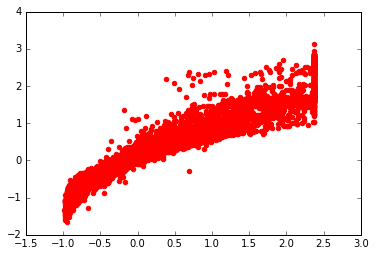

In [66]:
plt.scatter(y_test['price'], y_pred,color='red')
plt.show()

In [67]:
df_diamond_copy.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [68]:
df_diamond_copy.drop(df_diamond_copy.columns[0], axis=1,inplace=True)

In [69]:
df_diamond_copy.drop_duplicates(inplace=True)

In [70]:
df_diamond_copy.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [71]:
#Null Values Imputation
for column in df_diamond_copy.columns:
    if df_diamond_copy[column].dtype != 'object':
        df_diamond_median_copy = df_diamond_copy[column].median()
        df_diamond_copy[column] = df_diamond_copy[column].fillna(df_diamond_median_copy)    
        
df_diamond_copy.isnull().sum()       

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [72]:
df_diamond_copy = df_diamond_copy.replace(0, np.nan)

In [73]:
df_diamond_copy.dropna(inplace=True)

In [74]:
#Outlier removal
dtypes_copy=df_diamond_copy.dtypes[(df_diamond_copy.dtypes!= 'object')].index
for column in df_diamond_copy[dtypes_copy].columns:
    lr,ur=remove_outlier(df_diamond_copy[column])
    df_diamond_copy[column]=np.where(df_diamond_copy[column]>ur,ur,df_diamond_copy[column])
    df_diamond_copy[column]=np.where(df_diamond_copy[column]<lr,lr,df_diamond_copy[column])

In [75]:
#Imputing object values on cut with numeric values provided
df_diamond_copy['cut']=np.where(df_diamond_copy['cut'] =='Fair', '0', df_diamond_copy['cut'])
df_diamond_copy['cut']=np.where(df_diamond_copy['cut'] =='Good', '1', df_diamond_copy['cut'])
df_diamond_copy['cut']=np.where(df_diamond_copy['cut'] =='Very Good', '2', df_diamond_copy['cut'])
df_diamond_copy['cut']=np.where(df_diamond_copy['cut'] =='Premium', '3', df_diamond_copy['cut'])
df_diamond_copy['cut']=np.where(df_diamond_copy['cut'] =='Ideal', '4', df_diamond_copy['cut'])

#Imputing object values on color with numeric values provided
df_diamond_copy['color']=np.where(df_diamond_copy['color'] =='J', '0', df_diamond_copy['color'])
df_diamond_copy['color']=np.where(df_diamond_copy['color'] =='I', '1', df_diamond_copy['color'])
df_diamond_copy['color']=np.where(df_diamond_copy['color'] =='H', '2', df_diamond_copy['color'])
df_diamond_copy['color']=np.where(df_diamond_copy['color'] =='G', '3', df_diamond_copy['color'])
df_diamond_copy['color']=np.where(df_diamond_copy['color'] =='F', '4', df_diamond_copy['color'])
df_diamond_copy['color']=np.where(df_diamond_copy['color'] =='E', '5', df_diamond_copy['color'])
df_diamond_copy['color']=np.where(df_diamond_copy['color'] =='D', '6', df_diamond_copy['color'])

#Imputing object values on clarity with numeric values provided
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='I3', '0', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='I2', '1', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='I1', '2', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='SI2', '3', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='SI1', '4', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='VS2', '5', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='VS1', '6', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='VVS2', '7', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='VVS1', '8', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='IF', '9', df_diamond_copy['clarity'])
df_diamond_copy['clarity']=np.where(df_diamond_copy['clarity'] =='FL', '10', df_diamond_copy['clarity'])

In [76]:
# object to int64
obj_to_int = df_diamond_copy[['cut','color','clarity']]
for i in obj_to_int:
    df_diamond_copy[i] = df_diamond_copy[i].astype('int64')

In [77]:
# Copy all the predictor variables into X dataframe
X_copy = df_diamond_copy.drop('price', axis=1)

# Copy target into the y dataframe. 
y_copy = df_diamond_copy[['price']]

In [78]:
X_copy.shape

(26925, 9)

In [79]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.30 , random_state=1)

In [80]:
regressor = LinearRegression()
regressor.fit(X_train_copy, y_train_copy)


LinearRegression()

In [81]:
X_train_copy.shape

(18847, 9)

In [82]:
y_pred = regressor.predict(X_test_copy)
np.set_printoptions(precision=5) #2 decimal places
prediction = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_copy.values.reshape(len(y_test_copy),1)),1),columns=['Predicted','Actual'])
prediction

,Predicted,Actual
0,8287.158769,8758.0
1,4857.596683,4718.0
2,13477.002871,11965.0
3,11643.281714,11965.0
4,8618.019952,8165.0
...,...,...
8073,4199.950913,4642.0
8074,4321.270299,4038.0
8075,-28.192887,613.0
8076,408.627314,844.0


In [93]:
y_pred = regression_model.predict(X_test)
np.set_printoptions(precision=5) #2 decimal places
prediction = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1),columns=['Predicted','Actual'])
prediction

,Predicted,Actual
0,1.313408,1.449240
1,0.324015,0.283743
2,2.810623,2.374426
3,2.281614,2.374426
4,1.408858,1.278166
...,...,...
8073,0.134291,0.261818
8074,0.169290,0.087570
8075,-1.085484,-0.900507
8076,-0.959466,-0.833866


In [83]:
# Linear Regression Equation
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.18) * carat + (0.04) * cut + (0.13) * color + (0.21) * clarity + (0.01) * depth + (-0.01) * table + (-0.44) * x + (0.5) * y + (-0.19) * z + 

In [84]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif = pd.DataFrame()

In [86]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [87]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [88]:
vif_df = X[columns]
vif = pd.DataFrame()

In [89]:
vif['Variable_Inf_factor'] = [variance_inflation_factor(vif_df.values,i) for i in range(vif_df.shape[1])]

In [90]:
vif["features"] = vif_df.columns

In [91]:
#VIF values check
vif

,Variable_Inf_factor,features
0,32.891284,carat
1,1.509590,cut
2,1.119859,color
3,1.241452,clarity
4,4.453927,depth
5,1.618348,table
6,417.370935,x
7,398.581660,y
8,234.837061,z


## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations. => Answers provided in the Business Report